<a href="https://colab.research.google.com/github/NaHyeon1Kim/Modeling/blob/main/Boost_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

0. Adaboost

In [10]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.model_selection import train_test_split

In [11]:
# binary.csv 파일, 파티셔닝 8:2
binary = pd.read_csv("binary.csv")
y = binary.admit
X = binary.drop("admit", axis=1)

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, stratify = y)
boost = AdaBoostClassifier().fit( X_train, y_train)
rf = RandomForestClassifier().fit( X_train, y_train)

print( boost.score( X_test, y_test) )
rf.score( X_test, y_test)

0.675


0.6625

1. GradientBoost

In [12]:
from numpy import mean
from numpy import std
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from matplotlib import pyplot

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2 )

In [ ]:
#피팅
from sklearn.ensemble import AdaBoostClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
model = GradientBoostingClassifier(learning_rate=0.05,
                                   n_estimators=200).fit(X_train, y_train)
model2 = AdaBoostClassifier(learning_rate=0.05,
                                   n_estimators=200).fit( X_train, y_train)
model3 = RandomForestClassifier().fit( X_train, y_train)
model4 = XGBClassifier().fit( X_train, y_train)
model5 = LGBMClassifier().fit( X_train, y_train)

In [14]:
print(model.score(X_test, y_test))
print(model2.score(X_test, y_test))
print(model3.score(X_test, y_test))
print(model4.score(X_test, y_test))
print(model5.score(X_test, y_test))

0.6375
0.75
0.7
0.6375
0.7


In [15]:
# k-foldCV
model = GradientBoostingClassifier()
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.675 (0.073)


In [16]:
#GridSearchCV
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
xparam = {"learning_rate":[0.05, 0.1, 0.15], "n_estimators":[50,100,150]}
xgb_cv = GridSearchCV( XGBClassifier(), xparam ).fit( X_train, y_train)

In [17]:
best = xgb_cv.best_estimator_ #cv결과 중 제일 좋은 모형
best.score(X_test, y_test)

0.675

In [18]:
# 분류, xgboost for classification
from numpy import asarray
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from matplotlib import pyplot

# define dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)

# evaluate the model
model = XGBClassifier()
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

# fit
model = XGBClassifier()
model.fit(X, y)

# prediction
row = [2.56999479, -0.13019997, 3.16075093, -4.35936352, -1.61271951, -1.39352057, -2.48924933, -1.93094078, 3.26130366, 2.05692145]
row = asarray(row).reshape((1, len(row)))
yhat = model.predict(row)
print('Prediction: %d' % yhat)

Accuracy: 0.933 (0.022)
Prediction: 1


### 3.Gradient Boosting With XGBoost
- Extreme Gradient Boosting을 의미하며, sklearn 대신 xgboost 라이브러리 이용
- 계산 효율성을 높이며, 성능도 개선
- colab에 설치되어 있으며 필요 시 !pip install xgboost
- XGBClassifier와 XGBregressor 제공


In [19]:
# 분류, xgboost for classification
from numpy import asarray
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from matplotlib import pyplot

# define dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)

# evaluate the model
model = XGBClassifier()
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

# fit
model = XGBClassifier()
model.fit(X, y)

# prediction
row = [2.56999479, -0.13019997, 3.16075093, -4.35936352, -1.61271951, -1.39352057, -2.48924933, -1.93094078, 3.26130366, 2.05692145]
row = asarray(row).reshape((1, len(row)))
yhat = model.predict(row)
print('Prediction: %d' % yhat)

Accuracy: 0.933 (0.022)
Prediction: 1


### 4.Gradient Boosting With LightGBM
- Light Gradient Boosted Machine
- MS에 의해 개발, 효율성이 강조된 GBM
- 설치되어 있으며 필요 시 !pip install lightgbm
- LGBMClassifier , LGBMRegressor classes.


In [20]:
# lightgbm for classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from lightgbm import LGBMClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from matplotlib import pyplot

# define dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)

# evaluate the model
model = LGBMClassifier()
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

# fit
model = LGBMClassifier()
model.fit(X, y)

# prediction
row = [[2.56999479, -0.13019997, 3.16075093, -4.35936352, -1.61271951, -1.39352057, -2.48924933, -1.93094078, 3.26130366, 2.05692145]]
yhat = model.predict(row)
print('Prediction: %d' % yhat)

Accuracy: 0.934 (0.021)
[LightGBM] [Info] Number of positive: 501, number of negative: 499
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000143 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2550
[LightGBM] [Info] Number of data points in the train set: 1000, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.501000 -> initscore=0.004000
[LightGBM] [Info] Start training from score 0.004000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Prediction: 1


### 5.Gradient Boosting with CatBoost
- CatBoost는 Yandex가 개발한 라이브러리
- 효율적으로 계산하여 속도 개선
- 범주형 X변수에 대해 잘 작동: Category Gradient Boosting
- 설치 안되어 있으므로, 다음을 이용해서 설치
- !pip install catboost
- CatBoostClassifier , CatBoostRegressor


In [21]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 8.3 MB/s eta 0:00:00


In [22]:
# catboost for classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from catboost import CatBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from matplotlib import pyplot

# define dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)

# evaluate the model
model = CatBoostClassifier(verbose=0, n_estimators=100)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

# fit
model = CatBoostClassifier(verbose=0, n_estimators=100)
model.fit(X, y)

# prediction
row = [[2.56999479, -0.13019997, 3.16075093, -4.35936352, -1.61271951, -1.39352057, -2.48924933, -1.93094078, 3.26130366, 2.05692145]]
yhat = model.predict(row)
print('Prediction: %d' % yhat)

Accuracy: 0.925 (0.025)
Prediction: 1


Papers
-	Stochastic Gradient Boosting, 2002.
-	XGBoost: A Scalable Tree Boosting System, 2016.
-	LightGBM: A Highly Efficient Gradient Boosting Decision Tree, 2017.
-	CatBoost: gradient boosting with categorical features support, 2017.


# III. 연습
1. sms.csv를 읽으셔서 type을 target으로 하는 분류 모형
- 파티션 8:2 / 모형: XGBoost, RandomForest
- 상대적으로 좋은 성능의 모형을 gridsearch
- 테스트셋 예측->classification_report출력

In [7]:
#1. sms.csv
import pandas as pd
from sklearn.model_selection import train_test_split
sms = pd.read_csv("sms.csv")
sms.dropna(inplace=True)
X = sms.drop("type", axis=1)
y = sms.type
X_train,X_test,y_train, y_test = train_test_split( X,y,
                                                  test_size=0.2, stratify = y)

In [23]:
model1 = XGBClassifier().fit(X_train, y_train)
model2 = RandomForestClassifier().fit(X_train, y_train)

In [24]:
print(model1.score(X_train,y_train))
print(model2.score(X_train,y_train))

0.9875
0.996875


In [25]:
cv1 = GridSearchCV( RandomForestClassifier(), {"n_estimators":[250,300,350],
                                               "max_depth":[2,3,4]}).fit(X_train, y_train)
best1 = cv1.best_estimator_

In [26]:
from sklearn.metrics import classification_report
print( classification_report(y_test, best1.predict(X_test)) )

              precision    recall  f1-score   support

           0       0.76      0.89      0.82        56
           1       0.57      0.33      0.42        24

    accuracy                           0.73        80
   macro avg       0.66      0.61      0.62        80
weighted avg       0.70      0.72      0.70        80



2. train.csv를 읽으셔서 label을 target으로 하는 분류 모형
- 모형: XGBoost, RandomForest
- XGBoost, RandomForest 모형들을 gridsearch
- test.csv를 읽은 테스트셋에 대해서 예측->classification_report출력으로 두 모형을 비교

In [ ]:
#2. train.csv
train = pd.read_csv("train.csv")
train.dropna(inplace=True)
X_train = train.drop("label", axis=1)
y_train = train.label

test = pd.read_csv("test.csv")
X_test = test.drop("label", axis=1)
y_test = test.label

In [ ]:
X_train.shape

(5000, 784)

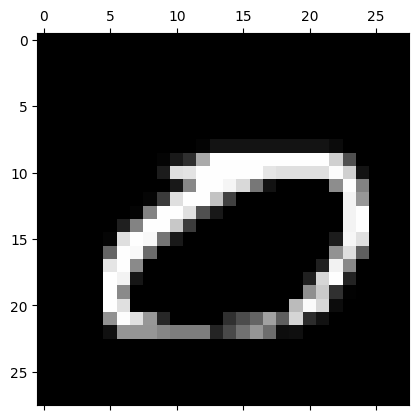

In [ ]:
import matplotlib.pyplot as plt

plt.matshow(X_train.values[0].reshape(28,28), cmap=plt.cm.gray)
plt.show()

In [ ]:
cv3 = GridSearchCV(XGBClassifier(), {"n_estimators":[100], "learning_rate":[0.1]},
                   verbose=4, cv=2).fit(X_train, y_train)
best3 = cv3.best_estimator_
print( classification_report(y_test, best3.predict(X_test)) )

cv4 = GridSearchCV(RandomForestClassifier(), {"n_estimators":[200], "max_depth":[3]},
                   verbose=4,cv=2).fit(X_train, y_train)
best4 = cv4.best_estimator_
print( classification_report(y_test, best4.predict(X_test)) )

Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV 1/2] END learning_rate=0.1, n_estimators=100;, score=0.910 total time= 1.3min
[CV 2/2] END learning_rate=0.1, n_estimators=100;, score=0.911 total time= 1.1min
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       100
           1       0.96      0.98      0.97       100
           2       0.92      0.96      0.94       100
           3       0.96      0.90      0.93       100
           4       0.96      0.94      0.95       100
           5       0.93      0.96      0.95       100
           6       0.95      0.95      0.95       100
           7       0.95      0.95      0.95       100
           8       0.96      0.93      0.94       100
           9       0.90      0.94      0.92       100

    accuracy                           0.95      1000
   macro avg       0.95      0.95      0.95      1000
weighted avg       0.95      0.95      0.95      1000

Fitting 2 folds fo